In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
shoe = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [3]:
print("AOV:",shoe["order_amount"].mean())

AOV: 3145.128


As specified in the question, we can see that the AOV is 3145.13

Let us take a look at the quantity of shoe contained in each individual order

In [4]:
shoe["total_items"].value_counts().sort_index()

1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
Name: total_items, dtype: int64

Most of the order size are reasonable except 17 orders which contain 2000 items. These orders are probably driving the AOV up.

Now let us take a look at the orders with large order amount. We notice that majority of the order amount are less than 25000, and there are few order amount over 25000 which is driving the AOV up.

In [5]:
shoe["order_amount"].value_counts().sort_index().tail(15)

948        1
960        2
965        1
980        1
1056       3
1064       1
1086       1
1408       2
1760       1
25725     19
51450     16
77175      9
102900     1
154350     1
704000    17
Name: order_amount, dtype: int64

We can do something naive such as dropping the orders with order amount greater than 25000 and then calculating the mean.

In [6]:
shoe_naive = shoe.loc[shoe["order_amount"] < 25000]
print("AOV:",shoe_naive['order_amount'].mean())

AOV: 302.58051448247926


By finding the mean of orders with order amount less than 25000, we get the AOV as 302.58

In [7]:
shoe_naive = shoe.loc[(shoe['order_amount']==25725) | (shoe['order_amount']==51450) | (shoe['order_amount']==77175) | (shoe['order_amount']==102900) | (shoe['order_amount']==154350) | (shoe['order_amount']==704000)]
shoe_naive['shop_id'].value_counts()

78    46
42    17
Name: shop_id, dtype: int64

We notice that the orders with order amount greater than 25000 only originate from two of the shops, shops with shop id 42 and 78.

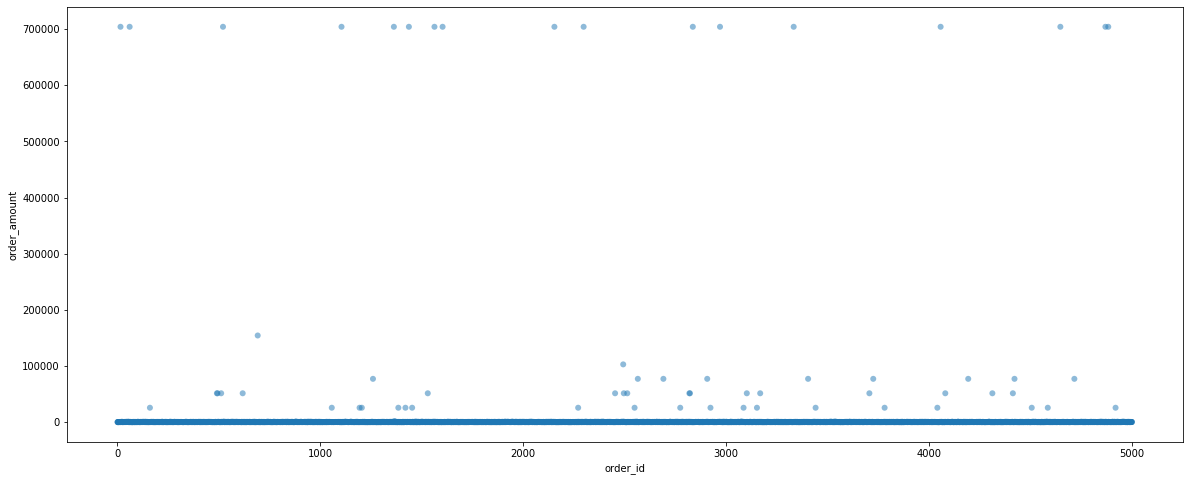

In [8]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='order_id',y='order_amount',data = shoe,edgecolor='none',alpha=0.5)

From the visualization, we can see that most of the order amount are less than 1000

In [9]:
shoe.loc[shoe['shop_id']==42].sort_values(by=['order_amount']).tail(17)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00


For shop ID 42, we notice that there are multiple large orders with the same time stamp, which could probably imply that these are malicious orders, such as bots attempting to buy large quantities of the shoe

In [10]:
shoe.loc[shoe['shop_id']==78].sort_values(by=['order_amount']).head(1)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57


The cost of a single shoe from shop ID 78 is 25725 which is probably an error.

A better metric can be used which would be the Median. It is also a central tendency metric.

In [11]:
print("Median:",shoe["order_amount"].median())

Median: 284.0


# Question 1 Answer

## 1a.
1)We need to consider the quanity of items in each individual order while calculating AOV instead of blindly calculating AOV.<br>
2)A few large orders from shops 42 and 78 are driving up the AOV. We notice that a single shoe from shop 78 costs 25725 and 17 orders from shop 42 contain 2000 shoes with each order amounting to 704000.
## 1b.
We should use a metric that is not affected by outliers such as Median. When we have data that is skewed or not symmetrically distributed, we prefer to use Median over Mean.
## 1c.
The value of Median is 284, which represents our data much better than the mean(3145.13)

# Question 2 Answer

## 2a. 
SELECT COUNT (DISTINCT ORDERID) AS Count<br>
FROM Orders AS O, Shippers AS S<br>
WHERE O.ShipperID=S.ShipperID and S.ShipperName="Speedy Express"<br>
;<br>
Output : 54
## 2b.
SELECT e.lastname as Name, COUNT(*)<br>
FROM Orders AS o, Employees AS e<br>
WHERE o.EmployeeID = e.EmployeeID<br>
GROUP BY o.EmployeeID<br>
ORDER BY COUNT(*) DESC<br>
LIMIT 1<br>
;<br>
Output : Peacock
## 2c.
SELECT p.ProductName as Product, SUM(d.Quantity) as Quantity<br>
FROM Orders AS o, OrderDetails AS d, Customers AS c, Products AS p<br>
WHERE d.OrderID = o.OrderID AND c.CustomerID = o.CustomerID AND c.Country = "Germany" AND d.ProductID = p.ProductID <br>
GROUP BY p.ProductID<br>
ORDER BY SUM(d.Quantity) DESC<br>
LIMIT 1;<br>
Output : Boston Crab Meat(Quantity : 160)